### This submission was prepared by:
Muhammad Borhan 10915497 <br>
and <br>
Amirul Mohd Hamka 10922049

# __Machine Learning Coursework 2 - Neural Network for classification__

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Firstly, we need to load, reshape and normalise the data to be able to use to train the neural network efficiently

In [3]:
def load_data(csv_data):
    df = pd.read_csv(csv_data)
    X = df[['x1', 'x2']].values
    y = df['y'].values.reshape(-1, 1)
    X_mean, X_std = X.mean(axis=0), X.std(axis=0) 
    X = (X - X_mean) / X_std #normalize the data using Z-score normalization
    return X, y

In [4]:
X, y = load_data('classification_training.csv')
X_val, y_val = load_data('classification_test.csv')

In [5]:
# Print the shape of the data to check if the data is loaded correctly
print(r"X shape:", X.shape,"," " y shape:", y.shape)

X shape: (300, 2) , y shape: (300, 1)


Next, we initialise the initial parameters of weights and bias to be used for the initial training epoch

In [6]:
def initialise_params(N_Neurons) :
    # we fix the pseudo-random number generator seed so rerunning the code produces the same output.
    rng = np.random.default_rng(seed=123456) 

    # initialise the weights to a small random number between -0.015 and 0.015.
    w1 = 0.03*rng.random((N_Neurons[0], N_Neurons[1])) -0.015
    w2 = 0.03*rng.random((N_Neurons[1], N_Neurons[2])) -0.015
    b1 = np.zeros((1,N_Neurons[1]))
    b2 = np.zeros((1,N_Neurons[2]))

    return w1, w2, b1, b2

We just create functions to ease the use of calculations during forward and backward propogation

In [7]:
def Grad_tanh(x) :
    return 1. - np.tanh(x)**2

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

def tanh(z):
    return np.tanh(z)


In this implementation, we define the forward and backward propagation steps for a simple neural network with one hidden layer using binary cross entropy as the loss function. <br> The forward function computes the outputs of the network for a given input x and with weights and bias

In [8]:
def forward(x, w1, b1, w2, b2):
    x = x.reshape(1, -1)  # shape becomes (1, 2) for 2 features
    n1 = np.dot(x, w1) + b1  
    a1 = tanh(n1)            
    n2 = np.dot(a1, w2) + b2  
    a2 = sigmoid(n2)          
    return n1, a1, n2, a2


The backward function computes the gradients and updates the weights and biases to minimize the binary cross-entropy loss.

In [9]:
def backward(x, y, n1, a1, n2, a2, W1, W2, b1, b2, alpha):
    x = x.reshape(1, -1)  # reshape to (1, 2) for 2 features
    y = y.reshape(1, -1)  # reshape to (1, 1) for single output

    # Gradients for output layer
    dL_da2 = -(y / a2) + ((1 - y) / (1 - a2))  
    da2_dn2 = sigmoid_derivative(n2)          
    dL_dn2 = dL_da2 * da2_dn2                 

    dL_dW2 = np.dot(a1.T, dL_dn2)             
    dL_db2 = np.sum(dL_dn2, axis=0, keepdims=True)  

    # Gradients for hidden layer
    dL_da1 = np.dot(dL_dn2, W2.T)             
    da1_dn1 = Grad_tanh(n1)                   
    dL_dn1 = dL_da1 * da1_dn1                 

    dL_dW1 = np.dot(x.T, dL_dn1)              
    dL_db1 = np.sum(dL_dn1, axis=0, keepdims=True)  

    # Update weights and biases
    W2 -= alpha * dL_dW2
    b2 -= alpha * dL_db2
    W1 -= alpha * dL_dW1
    b1 -= alpha * dL_db1

    return W1, W2, b1, b2


The train function performs the training process for the neural network by iterating through the dataset for a given number of epochs. It updates the weights and biases based on the computed gradients using forward and backward propagation, and calculates the loss using binary cross-entropy.

In [10]:
def train(X, y, hidden_size, alpha, epochs=1000):
    N_neurons = [X.shape[1], hidden_size, 1]  
    w1, w2, b1, b2 = initialise_params(N_neurons)

    for epoch in range(epochs):
        epoch_loss = 0  # Accumulate loss for the epoch
        
        for i in range(len(X)):
            # Forward pass for one sample
            n1, a1, n2, a2 = forward(X[i], w1, b1, w2, b2)

            # Backward pass for one sample
            w1, w2, b1, b2 = backward(X[i], y[i], n1, a1, n2, a2, w1, w2, b1, b2, alpha)

            # Compute and accumulate loss for one sample
            a2 = np.clip(a2, 1e-8, 1 - 1e-8)  # Stability for log
            loss = -np.mean(y[i] * np.log(a2) + (1 - y[i]) * np.log(1 - a2)) # Binary cross-entropy loss
            epoch_loss += loss

        # Average loss for the epoch
        epoch_loss /= len(X)

        # Print loss every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch: {epoch}, Loss: {epoch_loss}")

    return w1, b1, w2, b2, epoch_loss


We try to train the dataset with a randomly chosen hyperparameter to check if the function works correctly

In [11]:
w1, b1, w2, b2, loss = train(X, y, hidden_size=15, alpha=0.01, epochs=1000)
print(f'Yeay, the function works perfectly with the loss of: {loss}')

Epoch: 0, Loss: 0.6918687425214173
Epoch: 100, Loss: 0.2584823056055323
Epoch: 200, Loss: 0.25825373171226523
Epoch: 300, Loss: 0.2581208770499303
Epoch: 400, Loss: 0.2580097205992537
Epoch: 500, Loss: 0.25791757037730684
Epoch: 600, Loss: 0.2578335648800045
Epoch: 700, Loss: 0.25773988397337716
Epoch: 800, Loss: 0.2575996254781773
Epoch: 900, Loss: 0.2573006494765772
Yeay, the function works perfectly with the loss of: 0.25514620633368457


This function performs a hyperparameter search using grid search where it will try all the possible combinations by training the model and validate on the validation set to find the lowest loss between all those combinations. The function will return the best combination of hyperparameters and the corresponding model.

In [12]:
def hyperparameter_search(X_train, y_train, X_val, y_val, neuron_values, learning_rates, epochs=1000):
    best_loss = float('inf')  # Initialize best loss with a high value
    best_params = {}

    # Loop over all combinations of neurons and learning rates
    for neurons in neuron_values:
        for lr in learning_rates:
            # Train the model with the current set of parameters
            W1, b1, W2, b2, loss = train(X_train, y_train, hidden_size=neurons, alpha=lr, epochs=epochs)

            # Evaluate the model on the validation set
            val_loss = 0
            for i in range(len(X_val)):
                # Forward pass for each sample in the validation set
                n1, a1, n2, a2 = forward(X_val[i], W1, b1, W2, b2)

                # Calculate the binary cross-entropy loss for the current validation sample
                a2 = np.clip(a2, 1e-8, 1 - 1e-8)  # Stability for log
                loss = -np.mean(y_val[i] * np.log(a2) + (1 - y_val[i]) * np.log(1 - a2))
                val_loss += loss

            # Average the validation loss over the validation set
            val_loss /= len(X_val)

            # Print the current results
            print(f"Previously trained model with hyperparameters: Hidden size: {neurons}, Learning rate: {lr}, Validation Loss: {val_loss}")

            # Update the best loss and parameters if we find a new best validation loss
            if val_loss < best_loss:
                best_loss = val_loss
                best_params = {'hidden_size': neurons, 'learning_rate': lr, 'W1_shape': W1, 'b1_shape': b1, 'W2_shape': W2, 'b2_shape': b2}

    # Print the best parameters and corresponding validation loss
    print(f"Best params: {best_params}, Best validation loss: {best_loss}")
    return best_params


In [13]:
neuron_values = [5, 10, 15]  # List of possible numbers of neurons for the hidden layer
learning_rates = [0.01, 0.05, 0.1]  # List of possible learning rates

# Perform hyperparameter search
best_params = hyperparameter_search(X, y,X_val, y_val, neuron_values, learning_rates)

Epoch: 0, Loss: 0.6938803717640499
Epoch: 100, Loss: 0.26056147316652184
Epoch: 200, Loss: 0.2468195688137902
Epoch: 300, Loss: 0.014037980279051938
Epoch: 400, Loss: 0.0056951889626013575
Epoch: 500, Loss: 0.0034814965298632194
Epoch: 600, Loss: 0.002482218522976283
Epoch: 700, Loss: 0.001918991159540719
Epoch: 800, Loss: 0.0015595239105575672
Epoch: 900, Loss: 0.0013110260084616158
Previously trained model with hyperparameters: Hidden size: 5, Learning rate: 0.01, Validation Loss: 0.0014047390198119506
Epoch: 0, Loss: 0.5655431809681297
Epoch: 100, Loss: 0.004294376190363285
Epoch: 200, Loss: 0.0013442120762174176
Epoch: 300, Loss: 0.0007871419236945372
Epoch: 400, Loss: 0.0005543650100666834
Epoch: 500, Loss: 0.0004270457072855579
Epoch: 600, Loss: 0.0003469109919433835
Epoch: 700, Loss: 0.0002918953551260405
Epoch: 800, Loss: 0.00025181893466170557
Epoch: 900, Loss: 0.00022134052856452382
Previously trained model with hyperparameters: Hidden size: 5, Learning rate: 0.05, Validation

In [14]:
print(f"The best hyperparameter is the parameter with the number of hidden layers: {best_params['hidden_size']}," f" and the learning rate: {best_params['learning_rate']}")


The best hyperparameter is the parameter with the number of hidden layers: 5, and the learning rate: 0.1


We write another function for forward pass because this function will accept a batch of inputs and return the output of the network for each input in the batch.<br>
This is needed because the grid_points_norm returns the value as a batch compared to previously accept one input at a time

In [15]:
def forward_viz(x, w1, b1, w2, b2):
    # Ensure the input x is of shape (N, 2) where N is the number of points (e.g., 10000)
    n1 = np.dot(x, w1) + b1  
    a1 = tanh(n1)  
    n2 = np.dot(a1, w2) + b2  
    a2 = sigmoid(n2)  
    return n1, a1, n2, a2


This function visualizes the decision boundary of a neural network model trained on a two-dimensional dataset. It creates a grid of points, predicts the class of each point using the trained model, and plots the points according to their predicted classes. The function also plots the decision boundary, which is the line that separates between the two classes.

In [21]:
def visualize_decision_boundary(X, y, W1, b1, W2, b2, name):
    # Generate grid points to visualize the decision boundary
    #x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    #x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
    #x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
   # grid_points = np.c_[x1_grid.ravel(), x2_grid.ravel()]

    # Extend the range slightly beyond the min/max of the dataset
    x1_range = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100)
    x2_range = np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100)

    # Create the meshgrid
    x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

    # Flatten the grid for prediction
    grid_points = np.c_[x1_grid.ravel(), x2_grid.ravel()]

    # Normalize the grid points based on the training data mean and std
    X_mean, X_std = X.mean(axis=0), X.std(axis=0)
    grid_points_norm = (grid_points - X_mean) / X_std

    # Pass the grid points through the trained network
    _, _, _, A2_grid = forward_viz(grid_points_norm, W1, b1, W2, b2)

    # Reshape the output back into the grid shape for visualization
    decision_boundary = A2_grid.reshape(x1_grid.shape)

    # Visualize the decision boundary
    plt.figure(figsize=(8, 8))
    plt.contourf(x1_grid, x2_grid, decision_boundary, levels=np.linspace(0, 1, 11), cmap="coolwarm", alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap="coolwarm", edgecolors='k', marker='o', s=100, alpha=0.8)
    plt.title(f" {name} Output")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


Finally, we visualise the training data output and the validation data output with the decision boundary separately.

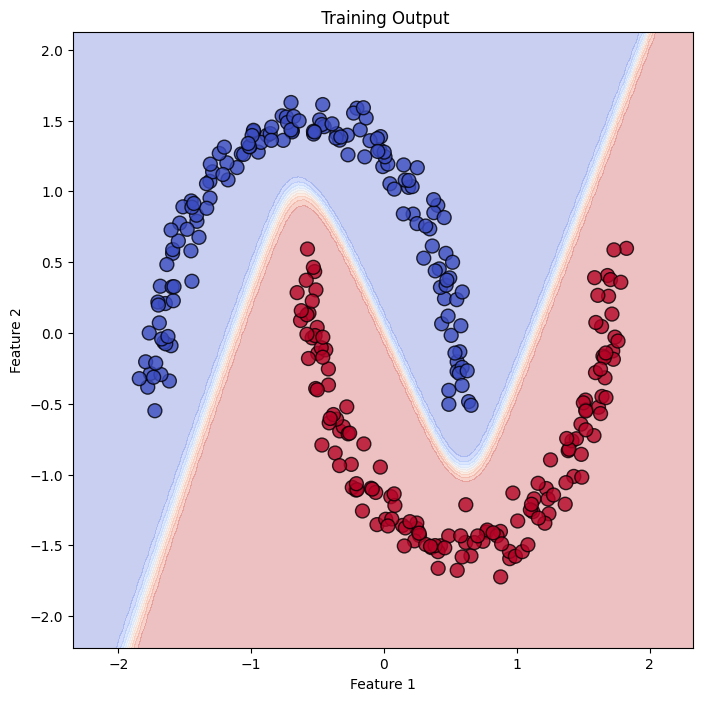

In [22]:
# Visualize the training data output with decision boundary
visualize_decision_boundary(X, y, best_params['W1_shape'], best_params['b1_shape'], best_params['W2_shape'], best_params['b2_shape'], name='Training')

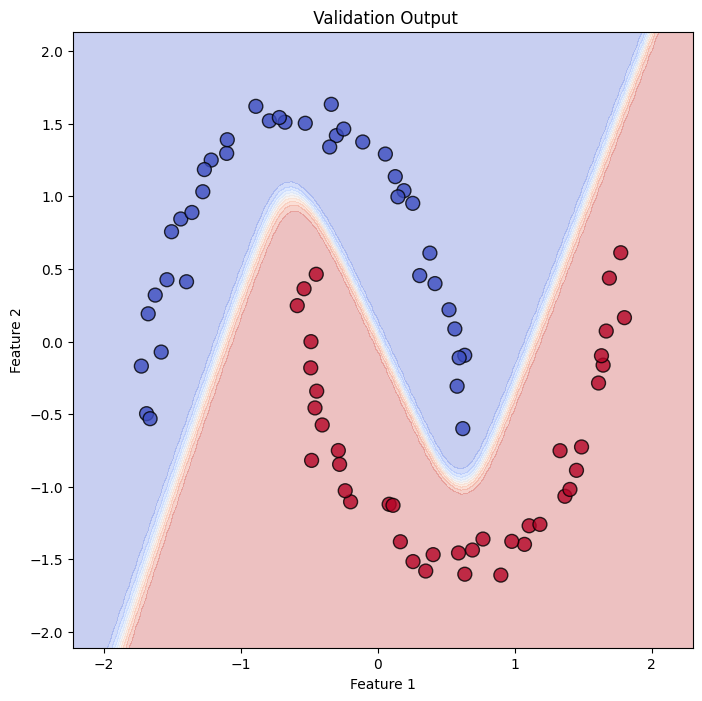

In [23]:
#Visualise the validation data with decision boundary
visualize_decision_boundary(X_val, y_val, best_params['W1_shape'], best_params['b1_shape'], best_params['W2_shape'], best_params['b2_shape'], name='Validation')
